###### Tez Projesi Çalışması
###### Çetin KAYA
###### 210904012

# **ÇALIŞAN DÖNÜŞÜM HIZI TAHMİNLEME** #
Giriş
Bu araştırma yıpranmaya bağlı olarak çalışan devir hızının tahminlenmesi ve buna neden faktörlerin ortaya çıkarılmasını amaçlamaktadır.
Kaggle uygulamasından seçilen veri seti üzerinden çeşitli makine öğrenmesi yöntemleri uygulanarak analizler yapılacaktır. Devamında oluşan öğretilen model ile oluşan sonuçlar test edilecektir.

 Çalışan devri ("çalışan kaybı" olarak da bilinir) şirketler için maliyetli bir sorundur. Bir çalışanı değiştirmenin gerçek maliyeti genellikle oldukça yüksek olabilir. Center for American Progress tarafından yapılan bir araştırma, şirketlerin bir çalışanı değiştirmek için genellikle o çalışanın maaşının yaklaşık beşte birini ödediğini ve yöneticiler veya en yüksek maaşlı çalışanlar değiştirilecekse maliyetin önemli ölçüde artabileceğini ortaya koymuştur. Başka bir deyişle, çoğu işveren için çalışanlarını değiştirmenin maliyeti önemli olmaya devam etmektedir. Bunun nedeni, mülakat yapmak ve yerine birini bulmak için harcanan zaman, işe başlama ikramiyeleri ve yeni çalışan yeni rolüne alışırken birkaç ay boyunca yaşanan üretkenlik kaybıdır.



Veri setini "https://www.kaggle.com/code/hamzaben/employee-churn-model-w-strategic-retention-plan" adresinden bulabilirsiniz.


## 1. Veri Setinin Hazırlanması
Veri temizleme ve hazırlama işlemleri veri üzerinde uygun bir analiz yapmak için oldukça önemli bir adımdır. Veri seti kaynağından alınarak düzgün bir formatta proje ortamına aktırılması için hazırlandı. Çalışma ortamı kuruldu.

## 2. Verilerin Alınması

Stratejik Elde Tutma Planı ile Çalışan Kaybı Modeli: Bir İK Analitiği Vaka Çalışması bilgilerini içeren veri seti alınır .

In [1]:
import pandas as pd
import sns as sns

import numpy

from utils import *
from handlingImbalancedData import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'D:\TuikUser\24496128680\Desktop\YÜKSEK LİSANS\TEZ DATASI\Projects\tez_calisma\data\Tez_Datasi.xlsx')
df.head(20)

,Yas,Yipranma,IsSeyahat,GunlukOran,Departman,EvdenUzaklik,Egitim,EgitimAlani,CalisanSayisi,CalisanNumarasi,...,İliskiMemnuniyeti,StandartSaatler,StokOpsiyonSeviyesi,ToplamCalismaYili,EgitimSureleriSonYil,IsYasamDengesi,SirketteGecirilenYil,MevcutRoldeYil,SonTerfidenBeriGecenYillar,CariMudurleGecirilenYillar
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## 3. Verinin Temizlenmesi
Veri üzerinde düzenleme yapmak için aşağıdaki işlemler yapılmıştır.
   * Değişken yapıları incelenmiştir.
   * Değişken tipleri incelenmiştir.
   * Tip dönüşümleri yapılmıştır.(Kategorik değişken tipleri object iken float tipe dönüştürülmüştür.)
   * Kategorik olan değişkenler dikey sütün halinde ve yatay sütün haline getirilerek encoding uygulanmıştır.(0,1)
   * Veriye max min scaler uygulanarak outler olan değerlere 0.5 aralığında bir değerler atanarak aralık daratılmıştır.
   * Attration(yıpranma) değerlerindeki dengesizlik için unbalasing metodlar uygulanarak "Evet" sayıları yükseltilmiştir.

#### DEĞİŞKEN YAPILARININ İNCELENMESİ ####

In [3]:
from tez_calisma.notebooks.utils import grap_col_names

cat_cols, num_cols, cat_but_car = grap_col_names(df)

Observations: 1470
Variables: 35
cat_cols: 10
num_cols: 25
cat_but_car: 0
num_but_cat: 0


In [4]:
print("\n##################### CATEGORIC #####################")
print(cat_cols)

print("\n##################### NUMERIC#####################")
print(num_cols)

print("\n##################### CARDINAL #####################")
print(cat_but_car)

print("\n##################### CLASS COUNT #####################")
df[cat_cols].nunique()


##################### CATEGORIC #####################
['Yipranma', 'IsSeyahat', 'Departman', 'EgitimAlani', 'Cinsiyet', 'IsRolu', 'MedeniDurum', '18YasUstu', 'FazlaMesai', 'StokOpsiyonSeviyesi']

##################### NUMERIC#####################
['Yas', 'GunlukOran', 'EvdenUzaklik', 'Egitim', 'CalisanSayisi', 'CalisanNumarasi', 'OrtamMemnuniyet', 'SaatlikUcret', 'IseKatilim', 'IsDuzeyi', 'IsTatmini', 'AylikGelir', 'AylikUcret', 'CalisilanSirketSayisi', 'YuzdeMaasZammi', 'Performans Derecelendirmesi', 'İliskiMemnuniyeti', 'StandartSaatler', 'ToplamCalismaYili', 'EgitimSureleriSonYil', 'IsYasamDengesi', 'SirketteGecirilenYil', 'MevcutRoldeYil', 'SonTerfidenBeriGecenYillar', 'CariMudurleGecirilenYillar']

##################### CARDINAL #####################
[]

##################### CLASS COUNT #####################


Yipranma               2
IsSeyahat              3
Departman              3
EgitimAlani            6
Cinsiyet               2
IsRolu                 9
MedeniDurum            3
18YasUstu              1
FazlaMesai             2
StokOpsiyonSeviyesi    5
dtype: int64

In [5]:
from tez_calisma.notebooks.utils import check_df

check_df(df)


##################### SHAPE #####################
(1470, 35)

##################### TYPES #####################
Yas                             int64
Yipranma                       object
IsSeyahat                      object
GunlukOran                      int64
Departman                      object
EvdenUzaklik                    int64
Egitim                          int64
EgitimAlani                    object
CalisanSayisi                   int64
CalisanNumarasi                 int64
OrtamMemnuniyet                 int64
Cinsiyet                       object
SaatlikUcret                    int64
IseKatilim                      int64
IsDuzeyi                        int64
IsRolu                         object
IsTatmini                       int64
MedeniDurum                    object
AylikGelir                      int64
AylikUcret                      int64
CalisilanSirketSayisi           int64
18YasUstu                      object
FazlaMesai                     object
YuzdeMaasZamm

## 4. Verinin Görselleştirilmesi

Veri temizlenip işlendikten sonra görsel verilerin oluşturulacağı veri setleri oluşturulmuştur. Bu veri setleri kullanılarak aşağıdaki görsellere yer verilmiştir.

          Cinsiyet  Ration
Cinsiyet                  
Male           882    60.0
Female         588    40.0
##########################################



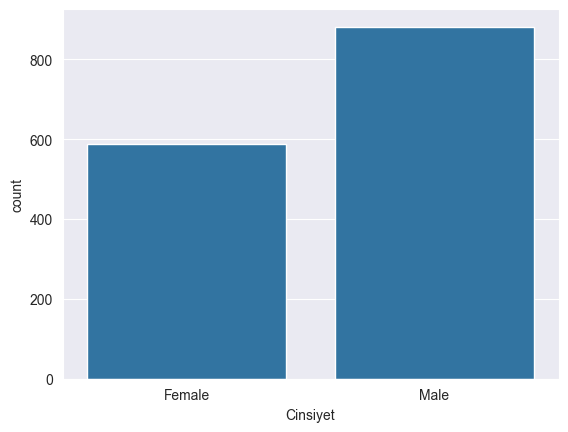

                  EgitimAlani     Ration
EgitimAlani                             
Life Sciences             606  41.224490
Medical                   464  31.564626
Marketing                 159  10.816327
Technical Degree          132   8.979592
Other                      82   5.578231
Human Resources            27   1.836735
##########################################



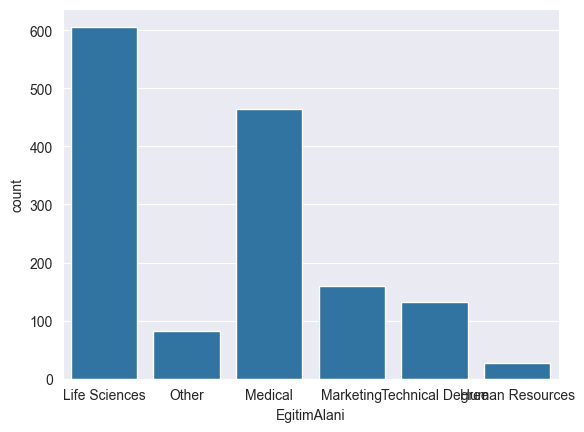

In [7]:
from tez_calisma.notebooks.utils import cat_summary

cat_summary(df, "Cinsiyet" ,True)
cat_summary(df, "EgitimAlani" ,True)

NameError: name 'plt' is not defined

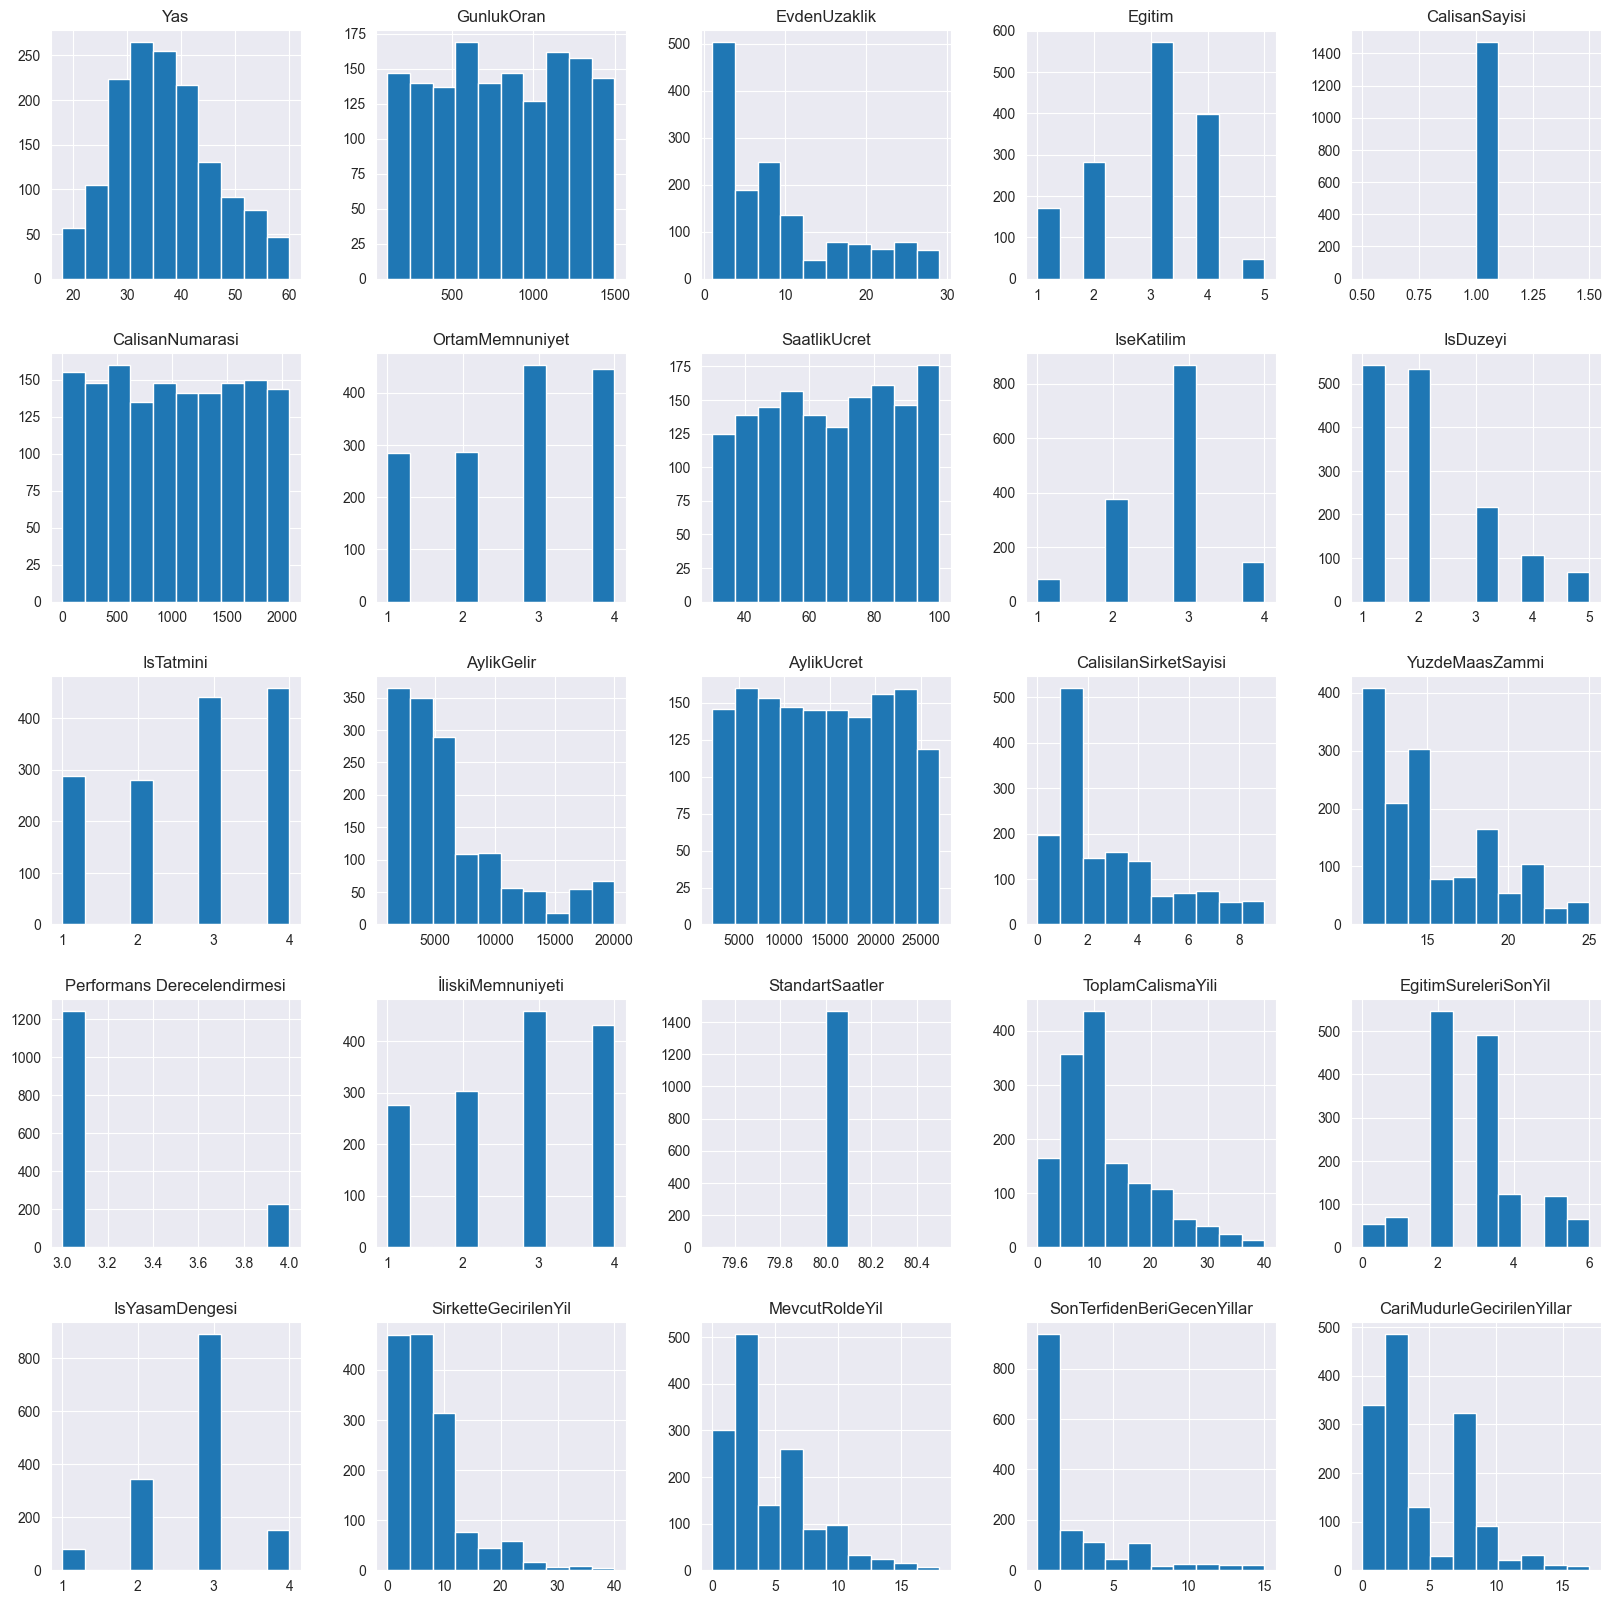

In [8]:
df.hist(figsize=(20,20))
plt.show()

          Yipranma     Ration
Yipranma                     
No            1233  83.877551
Yes            237  16.122449
##########################################



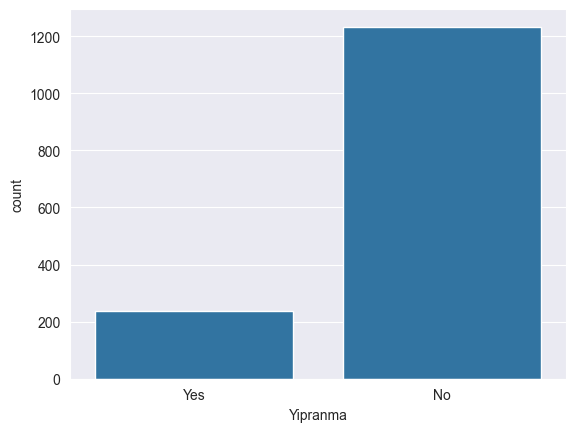

                   IsSeyahat     Ration
IsSeyahat                              
Travel_Rarely           1043  70.952381
Travel_Frequently        277  18.843537
Non-Travel               150  10.204082
##########################################



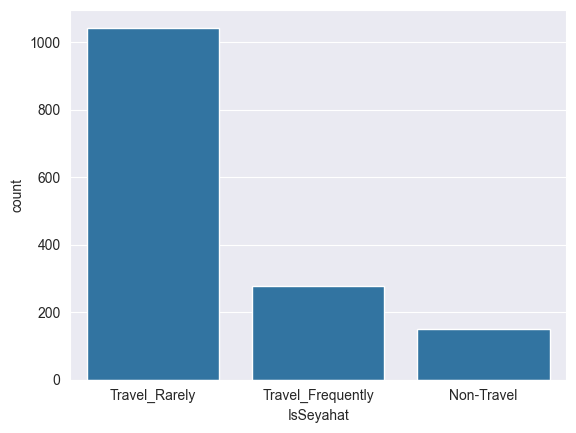

                        Departman     Ration
Departman                                   
Research & Development        961  65.374150
Sales                         446  30.340136
Human Resources                63   4.285714
##########################################



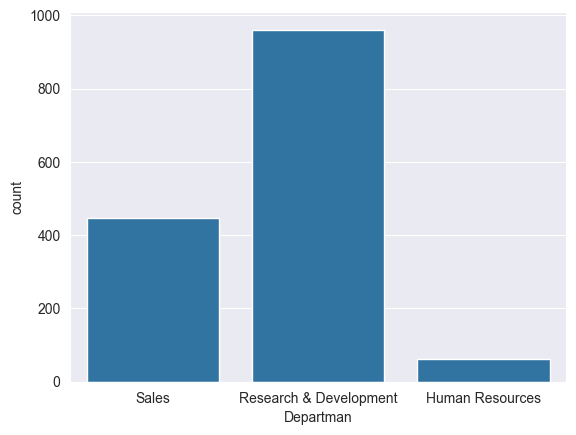

                  EgitimAlani     Ration
EgitimAlani                             
Life Sciences             606  41.224490
Medical                   464  31.564626
Marketing                 159  10.816327
Technical Degree          132   8.979592
Other                      82   5.578231
Human Resources            27   1.836735
##########################################



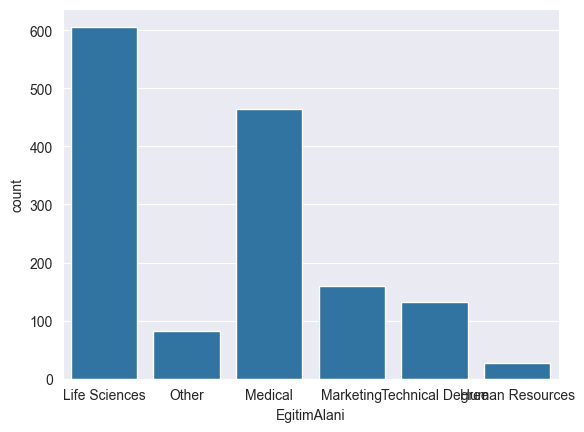

          Cinsiyet  Ration
Cinsiyet                  
Male           882    60.0
Female         588    40.0
##########################################



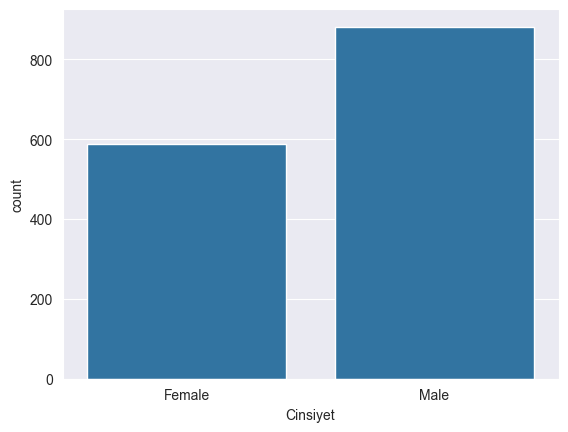

                           IsRolu     Ration
IsRolu                                      
Sales Executive               326  22.176871
Research Scientist            292  19.863946
Laboratory Technician         259  17.619048
Manufacturing Director        145   9.863946
Healthcare Representative     131   8.911565
Manager                       102   6.938776
Sales Representative           83   5.646259
Research Director              80   5.442177
Human Resources                52   3.537415
##########################################



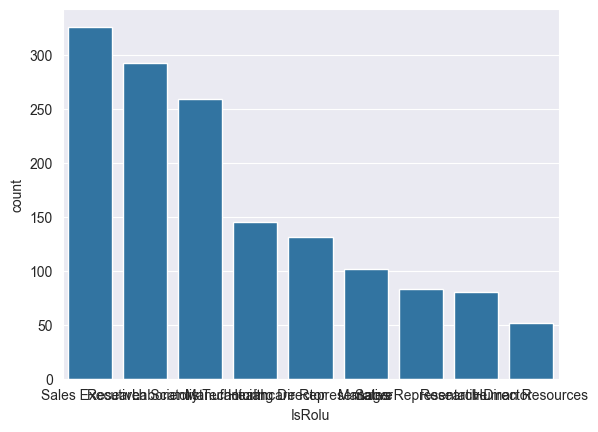

             MedeniDurum     Ration
MedeniDurum                        
Married              673  45.782313
Single               470  31.972789
Divorced             327  22.244898
##########################################



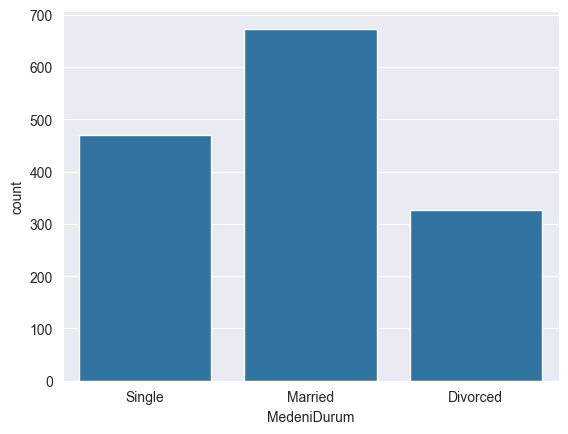

           18YasUstu  Ration
18YasUstu                   
Y               1470   100.0
##########################################



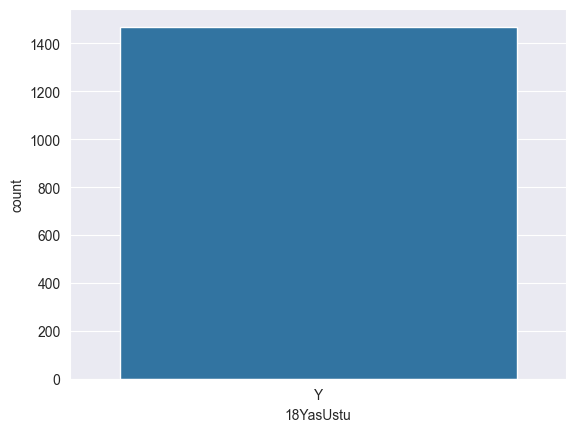

            FazlaMesai    Ration
FazlaMesai                      
No                1054  71.70068
Yes                416  28.29932
##########################################



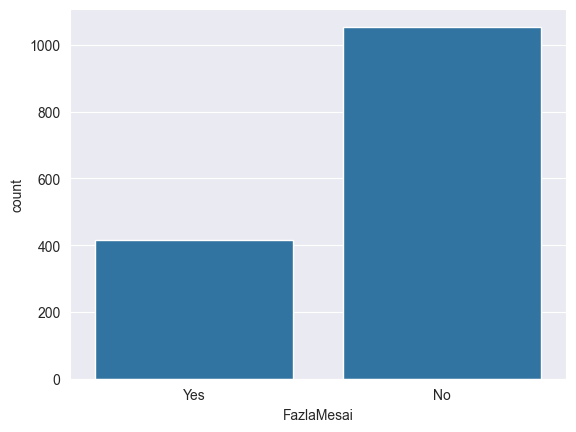

                     StokOpsiyonSeviyesi     Ration
StokOpsiyonSeviyesi                                
0                                    631  42.925170
1                                    596  40.544218
2                                    157  10.680272
3                                     85   5.782313
StockOptionLevel                       1   0.068027
##########################################



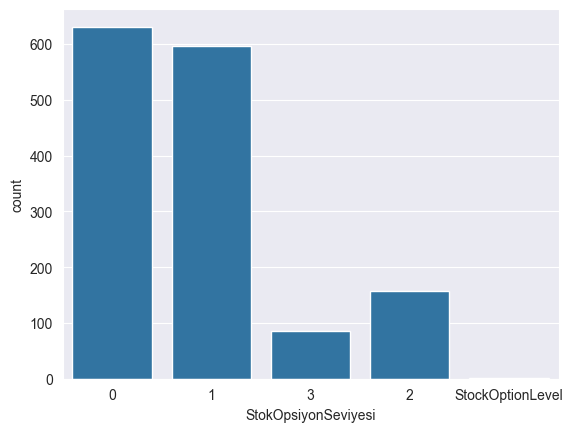

In [9]:
df_cat = df[cat_cols]
for col in df_cat.columns:
    cat_summary(df_cat, col ,True)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

plt.style.use('_mpl-gallery-nogrid')
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Yipranma'] == 'No', 'Yas'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Yipranma'] == 'Yes', 'Yas'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

OSError: 'seaborn-colorblind' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Figure size 1500x600 with 0 Axes>

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [27]:
# değişkenler altalta kalır
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

9 columns were label encoded.


In [28]:

print(df.dtypes)

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [29]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [31]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1.0,5.0,3.579098,5.0,0.000000,1.25,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588
1,3.690476,0.0,2.5,0.633500,2.5,1.250000,0.00,1.0,0.0,0.002419,...,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824
2,2.261905,1.0,5.0,4.549034,2.5,0.178571,1.25,4.0,0.0,0.007257,...,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000
3,1.785714,0.0,2.5,4.617037,2.5,0.357143,3.75,1.0,0.0,0.009676,...,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000
4,1.071429,0.0,5.0,1.750179,2.5,0.178571,0.00,3.0,0.0,0.014514,...,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235


## Imbalance data check and resampling the attrition "yes" data

In [32]:
#imbalanced data control
df['Attrition'].value_counts()
#The class in an imbalanced classification predictive modeling problem that has slightly more examples.
#thus, there is no imbalanced data problem, but we can add some sampling in data get equal sample

Attrition
0.0    1233
1.0     237
Name: count, dtype: int64

In [33]:
""""from sklearn.utils import resample
df1 = df.copy()
#create two different dataframe of majority and minority class
df_majority = df1[(df1['Attrition']==0)]
df_minority = df1[(df1['Attrition']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1233, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled.reset_index(drop = True, inplace = True)
df_upsampled.head()
df = df_upsampled""""

SyntaxError: unterminated string literal (detected at line 15) (2471485735.py, line 15)

In [34]:
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

matplotlib.rcParams.update({'font.size': 8})
plt.figure(figsize= (24,15))
sns.heatmap(df.corr(), annot = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))

<Axes: >

In [35]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (1470, 35)


In [36]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1.0,5.0,3.579098,5.0,0.000000,1.25,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588
1,3.690476,0.0,2.5,0.633500,2.5,1.250000,0.00,1.0,0.0,0.002419,...,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824
2,2.261905,1.0,5.0,4.549034,2.5,0.178571,1.25,4.0,0.0,0.007257,...,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000
3,1.785714,0.0,2.5,4.617037,2.5,0.357143,3.75,1.0,0.0,0.009676,...,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000
4,1.071429,0.0,5.0,1.750179,2.5,0.178571,0.00,3.0,0.0,0.014514,...,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235


## 5.Verilerin eğitim ve test olarak bölünmesi



In [37]:

y_first = df["Attrition"]
X_first = df.drop(["Attrition"] , axis = 1)


In [38]:

Imbalance_ros = ImbalanceDuzenle(X_first, y_first)
X_ros, y_ros = Imbalance_ros.ROS()
Imbalance_smote = ImbalanceDuzenle(X_first, y_first)
X_smote, y_smote  = Imbalance_smote.Smote()
Imbalance_rus = ImbalanceDuzenle(X_first, y_first)
X_rus, y_rus=Imbalance_rus.RUS()
Imbalance_nm = ImbalanceDuzenle(X_first, y_first)
X_nm, y_nm=Imbalance_nm.NM()
Imbalance_tl = ImbalanceDuzenle(X_first, y_first)
X_tl, y_tl=Imbalance_tl.TL()


orjinal veri boyutu Attrition
0.0    1233
1.0     237
Name: count, dtype: int64
ROS yapıldıktan sonra veri boyutu: Attrition
1.0    1233
0.0    1233
Name: count, dtype: int64
orjinal veri boyutu Attrition
0.0    1233
1.0     237
Name: count, dtype: int64
TL yapıldıktan sonra veri boyutu: Attrition
1.0    1233
0.0    1233
Name: count, dtype: int64
orjinal veri boyutu: Attrition
0.0    1233
1.0     237
Name: count, dtype: int64
RUS yapıldıktan sonra veri boyutu: Attrition
0.0    237
1.0    237
Name: count, dtype: int64
orjinal veri boyutu Attrition
0.0    1233
1.0     237
Name: count, dtype: int64
TL yapıldıktan sonra veri boyutu: Attrition
0.0    237
1.0    237
Name: count, dtype: int64
orjinal veri boyutu Attrition
0.0    1233
1.0     237
Name: count, dtype: int64
TL yapıldıktan sonra veri boyutu: Attrition
0.0    1178
1.0     237
Name: count, dtype: int64


## ROS ile Upsampling edilen datanı model karşılaştırması yöntemle

Logistic Classifier
Logistic Classifier Model Dogruluk ortalaması 0.7230383260382193
Logistic Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.71052632 0.74036511 0.77484787 0.72616633 0.663286  ]


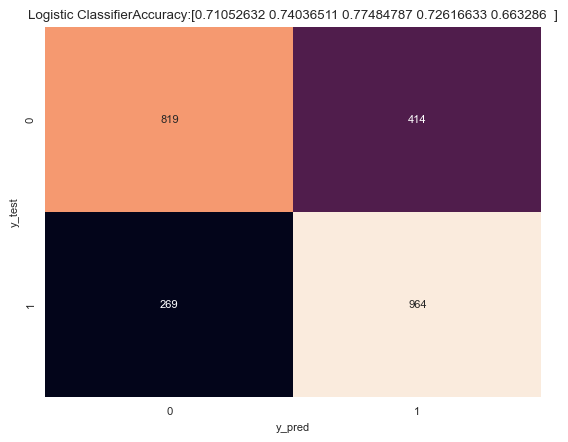

Logistic Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.71      1233
         1.0       0.70      0.78      0.74      1233

    accuracy                           0.72      2466
   macro avg       0.73      0.72      0.72      2466
weighted avg       0.73      0.72      0.72      2466

########################################


Support Vector Machine 
Support Vector Machine  Model Dogruluk ortalaması 0.8394289280699017
Support Vector Machine  Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.80769231 0.8356998  0.89655172 0.87018256 0.78701826]


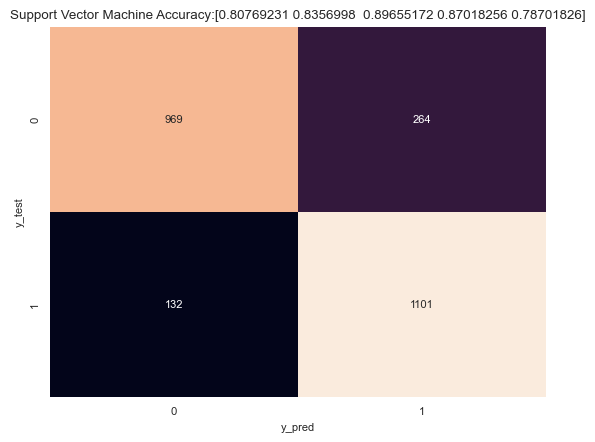

Support Vector Machine  Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      1233
         1.0       0.81      0.89      0.85      1233

    accuracy                           0.84      2466
   macro avg       0.84      0.84      0.84      2466
weighted avg       0.84      0.84      0.84      2466

########################################


K-Neighbors Classifier
K-Neighbors Classifier Model Dogruluk ortalaması 0.8191441311970831
K-Neighbors Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.8097166  0.82758621 0.85395538 0.82150101 0.78296146]


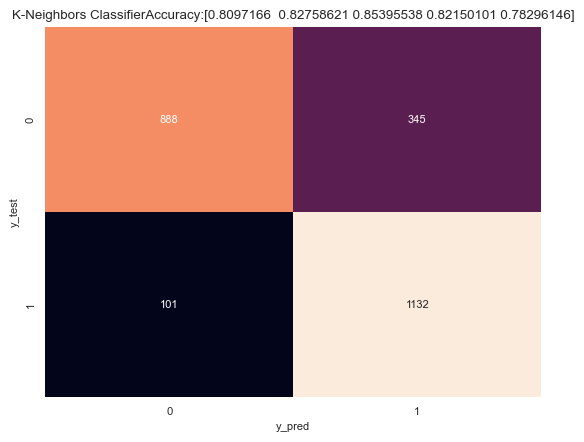

K-Neighbors Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1233
         1.0       0.77      0.92      0.84      1233

    accuracy                           0.82      2466
   macro avg       0.83      0.82      0.82      2466
weighted avg       0.83      0.82      0.82      2466

########################################


Decision Tree
Decision Tree Model Dogruluk ortalaması 0.7291941431046801
Decision Tree Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.53643725 0.91075051 0.71805274 0.87626775 0.60446247]


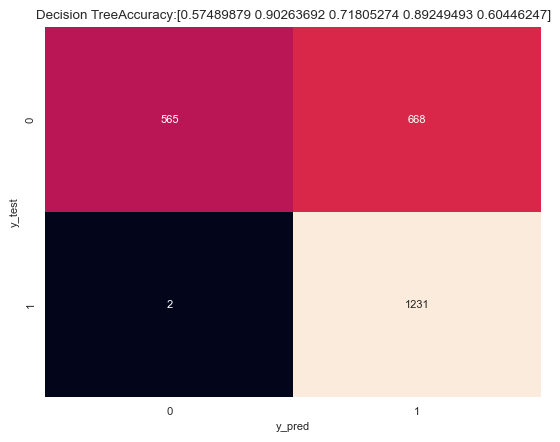

Decision Tree Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63      1233
         1.0       0.65      1.00      0.79      1233

    accuracy                           0.73      2466
   macro avg       0.82      0.73      0.71      2466
weighted avg       0.82      0.73      0.71      2466

########################################


Random Forest
Random Forest Model Dogruluk ortalaması 0.7989726617996074
Random Forest Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.53238866 0.97363083 0.96754564 0.96754564 0.55375254]


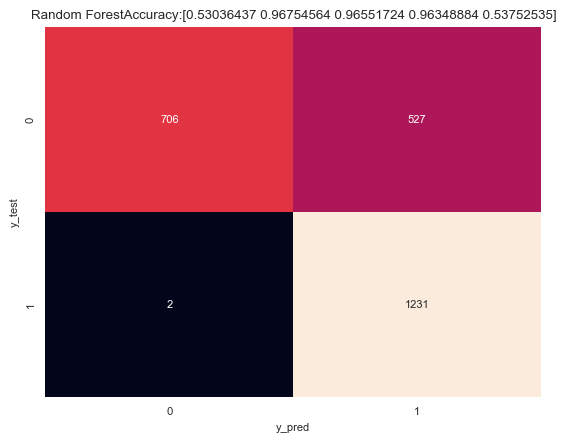

Random Forest Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73      1233
         1.0       0.70      1.00      0.82      1233

    accuracy                           0.79      2466
   macro avg       0.85      0.79      0.78      2466
weighted avg       0.85      0.79      0.78      2466

########################################


Naive Bias Classifier
Naive Bias Classifier Model Dogruluk ortalaması 0.7481781376518218
Naive Bias Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.74089069 0.74442191 0.75456389 0.7525355  0.7484787 ]


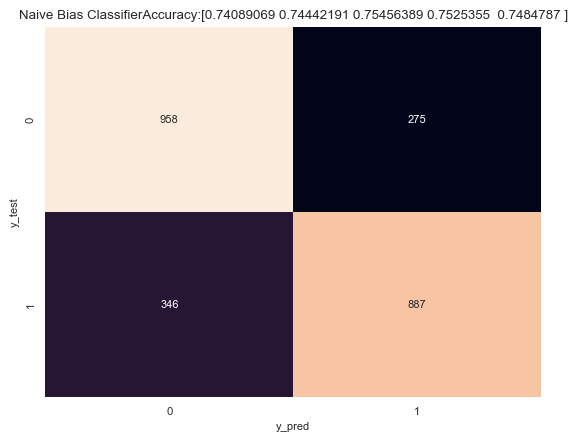

Naive Bias Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.76      1233
         1.0       0.76      0.72      0.74      1233

    accuracy                           0.75      2466
   macro avg       0.75      0.75      0.75      2466
weighted avg       0.75      0.75      0.75      2466

########################################




In [39]:
#model importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

models = {
 "Logistic Classifier":LogisticRegression(),
 "Support Vector Machine ":SVC(),
 "K-Neighbors Classifier":KNeighborsClassifier(),
 "Decision Tree":DecisionTreeClassifier(),
 "Random Forest":RandomForestClassifier(),
 "Naive Bias Classifier":BernoulliNB()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_first,y_first)
    #model Prediction
    y_pred = cross_val_predict(model, X_ros, y_ros, cv = 5)
    accuracy_skor = cross_val_score(model, X_ros, y_ros, cv=5)
    print(list(models.keys())[i])

    print(list(models.keys())[i],'Model Dogruluk ortalaması', accuracy_skor.mean())
    print(list(models.keys())[i],'Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri', accuracy_skor)

    cf_matrix_log_model=confusion_matrix(y_ros,y_pred)
    sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
    log_model_score=cross_val_score(model, X_ros, y_ros, cv=5)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(list(models.keys())[i]+ "Accuracy:"+str(log_model_score))
    plt.show()


    print(list(models.keys())[i], "Sınıflandırma Raporu")
    print(classification_report(y_ros, y_pred))
    print("#"*40)
    print('\n')


## Smote ile Upsampling edilen datanı model karşılaştırması yöntemle

In [40]:
#model importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

models = {
 "Logistic Classifier":LogisticRegression(),
 "Support Vector Machine ":SVC(),
 "K-Neighbors Classifier":KNeighborsClassifier(),
 "Decision Tree":DecisionTreeClassifier(),
 "Random Forest":RandomForestClassifier(),
 "Naive Bias Classifier":BernoulliNB()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_train,y_train)
    #model Prediction
    y_pred = cross_val_predict(model, X_smote, y_smote, cv = 5)
    accuracy_skor = cross_val_score(model, X_smote, y_smote, cv=5)
    print(list(models.keys())[i])

    print(list(models.keys())[i],'Model Dogruluk ortalaması', accuracy_skor.mean())
    print(list(models.keys())[i],'Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri', accuracy_skor)

    cf_matrix_log_model=confusion_matrix(y_smote,y_pred)
    sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
    log_model_score=cross_val_score(model, X_smote, y_smote, cv=5)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(list(models.keys())[i]+ "Accuracy:"+str(log_model_score))
    plt.show()


    print(list(models.keys())[i], "Sınıflandırma Raporu")
    print(classification_report(y_smote, y_pred))
    print("#"*40)
    print('\n')


NameError: name 'X_train' is not defined

## RUS ile Upsampling edilen datanın model karşılaştırması yöntemle

In [24]:
#model importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

models = {
 "Logistic Classifier":LogisticRegression(),
 "Support Vector Machine ":SVC(),
 "K-Neighbors Classifier":KNeighborsClassifier(),
 "Decision Tree":DecisionTreeClassifier(),
 "Random Forest":RandomForestClassifier(),
 "Naive Bias Classifier":BernoulliNB()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_train,y_train)
    #model Prediction
    y_pred = cross_val_predict(model, X_rus, y_rus, cv = 5)
    accuracy_skor = cross_val_score(model, X_rus, y_rus, cv=5)
    print(list(models.keys())[i])

    print(list(models.keys())[i],'Model Dogruluk ortalaması', accuracy_skor.mean())
    print(list(models.keys())[i],'Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri', accuracy_skor)

    cf_matrix_log_model=confusion_matrix(y_rus,y_pred)
    sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
    log_model_score=cross_val_score(model, X_rus, y_rus, cv=5)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(list(models.keys())[i]+ "Accuracy:"+str(log_model_score))
    plt.show()


    print(list(models.keys())[i], "Sınıflandırma Raporu")
    print(classification_report(y_rus, y_pred))
    print("#"*40)
    print('\n')


NameError: name 'X_train' is not defined

## NearMiss ile Upsampling edilen datanın model karşılaştırması yöntemle

Logistic Classifier
Logistic Classifier Model Dogruluk ortalaması 0.6981410974244121
Logistic Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.67368421 0.75789474 0.69473684 0.74736842 0.61702128]


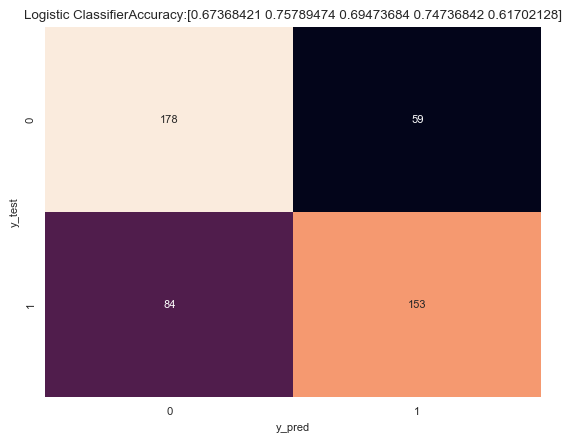

Logistic Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       237
         1.0       0.72      0.65      0.68       237

    accuracy                           0.70       474
   macro avg       0.70      0.70      0.70       474
weighted avg       0.70      0.70      0.70       474

########################################


Support Vector Machine 
Support Vector Machine  Model Dogruluk ortalaması 0.7193281075027995
Support Vector Machine  Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.70526316 0.69473684 0.81052632 0.70526316 0.68085106]


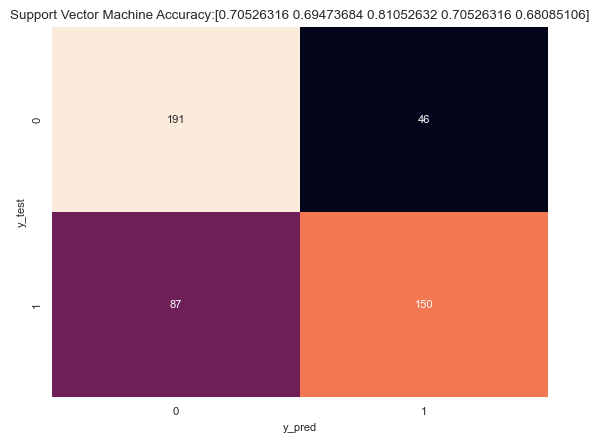

Support Vector Machine  Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74       237
         1.0       0.77      0.63      0.69       237

    accuracy                           0.72       474
   macro avg       0.73      0.72      0.72       474
weighted avg       0.73      0.72      0.72       474

########################################


K-Neighbors Classifier
K-Neighbors Classifier Model Dogruluk ortalaması 0.5928331466965285
K-Neighbors Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.48421053 0.6        0.64210526 0.64210526 0.59574468]


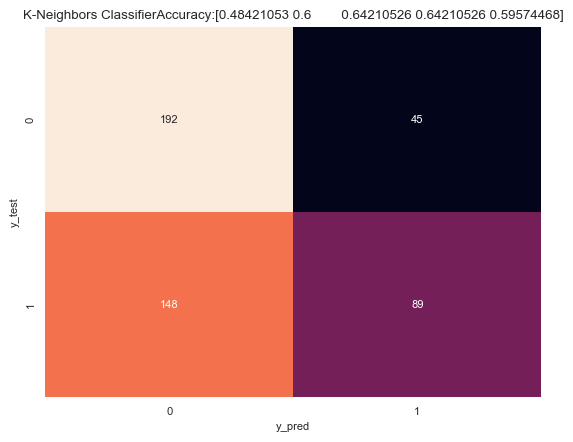

K-Neighbors Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.56      0.81      0.67       237
         1.0       0.66      0.38      0.48       237

    accuracy                           0.59       474
   macro avg       0.61      0.59      0.57       474
weighted avg       0.61      0.59      0.57       474

########################################


Decision Tree
Decision Tree Model Dogruluk ortalaması 0.5017245240761479
Decision Tree Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.35789474 0.62105263 0.64210526 0.56842105 0.31914894]


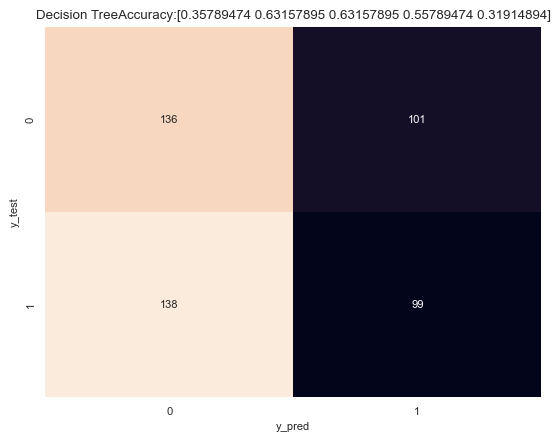

Decision Tree Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53       237
         1.0       0.49      0.42      0.45       237

    accuracy                           0.50       474
   macro avg       0.50      0.50      0.49       474
weighted avg       0.50      0.50      0.49       474

########################################


Random Forest
Random Forest Model Dogruluk ortalaması 0.6262038073908174
Random Forest Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.54736842 0.71578947 0.72631579 0.69473684 0.44680851]


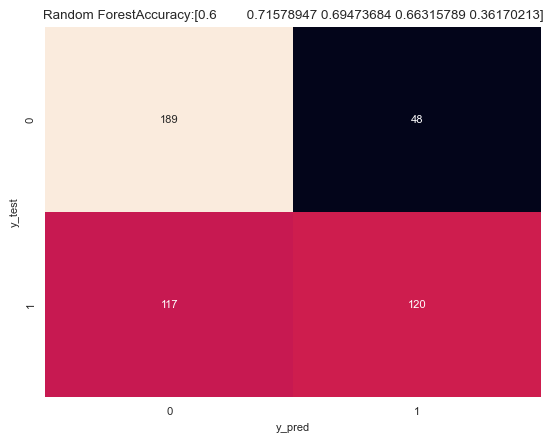

Random Forest Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70       237
         1.0       0.71      0.51      0.59       237

    accuracy                           0.65       474
   macro avg       0.67      0.65      0.64       474
weighted avg       0.67      0.65      0.64       474

########################################


Naive Bias Classifier
Naive Bias Classifier Model Dogruluk ortalaması 0.7236282194848824
Naive Bias Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.76842105 0.67368421 0.72631579 0.72631579 0.72340426]


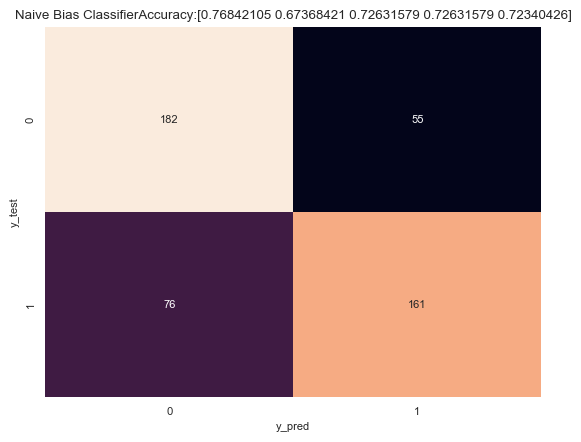

Naive Bias Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       237
         1.0       0.75      0.68      0.71       237

    accuracy                           0.72       474
   macro avg       0.73      0.72      0.72       474
weighted avg       0.73      0.72      0.72       474

########################################




In [25]:
#model importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

models = {
 "Logistic Classifier":LogisticRegression(),
 "Support Vector Machine ":SVC(),
 "K-Neighbors Classifier":KNeighborsClassifier(),
 "Decision Tree":DecisionTreeClassifier(),
 "Random Forest":RandomForestClassifier(),
 "Naive Bias Classifier":BernoulliNB()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_first,y_first)
    #model Prediction
    y_pred = cross_val_predict(model, X_nm, y_nm, cv = 5)
    accuracy_skor = cross_val_score(model, X_nm, y_nm, cv=5)
    print(list(models.keys())[i])

    print(list(models.keys())[i],'Model Dogruluk ortalaması', accuracy_skor.mean())
    print(list(models.keys())[i],'Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri', accuracy_skor)

    cf_matrix_log_model=confusion_matrix(y_nm,y_pred)
    sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
    log_model_score=cross_val_score(model, X_nm, y_nm, cv=5)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(list(models.keys())[i]+ "Accuracy:"+str(log_model_score))
    plt.show()


    print(list(models.keys())[i], "Sınıflandırma Raporu")
    print(classification_report(y_nm, y_pred))
    print("#"*40)
    print('\n')


## TomekLinks ile Upsampling edilen datanın model karşılaştırması yöntemle

Logistic Classifier
Logistic Classifier Model Dogruluk ortalaması 0.869964664310954
Logistic Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.8975265  0.87279152 0.85512367 0.85512367 0.86925795]


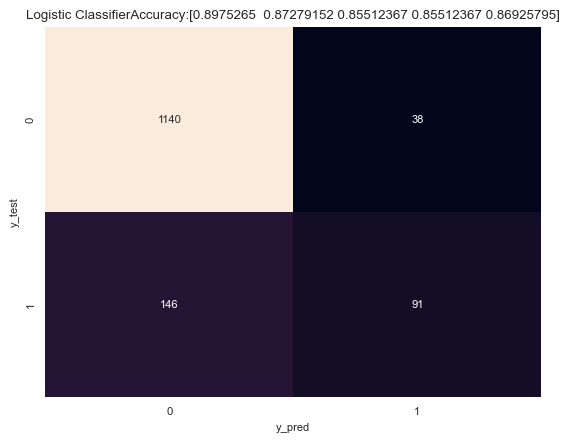

Logistic Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1178
         1.0       0.71      0.38      0.50       237

    accuracy                           0.87      1415
   macro avg       0.80      0.68      0.71      1415
weighted avg       0.86      0.87      0.85      1415

########################################


Support Vector Machine 
Support Vector Machine  Model Dogruluk ortalaması 0.8685512367491166
Support Vector Machine  Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.86925795 0.86219081 0.86925795 0.85865724 0.88339223]


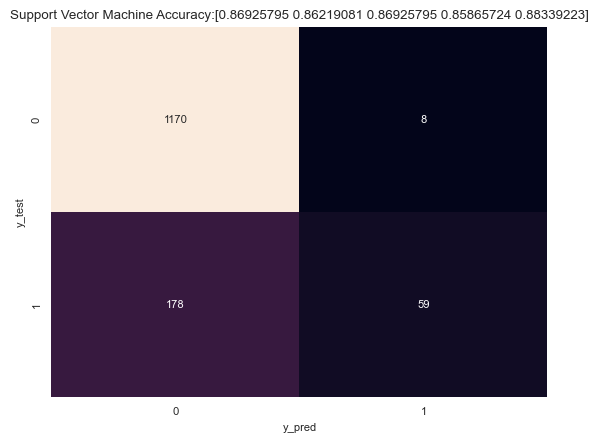

Support Vector Machine  Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      1178
         1.0       0.88      0.25      0.39       237

    accuracy                           0.87      1415
   macro avg       0.87      0.62      0.66      1415
weighted avg       0.87      0.87      0.84      1415

########################################


K-Neighbors Classifier
K-Neighbors Classifier Model Dogruluk ortalaması 0.8445229681978799
K-Neighbors Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.83392226 0.84452297 0.85512367 0.84452297 0.84452297]


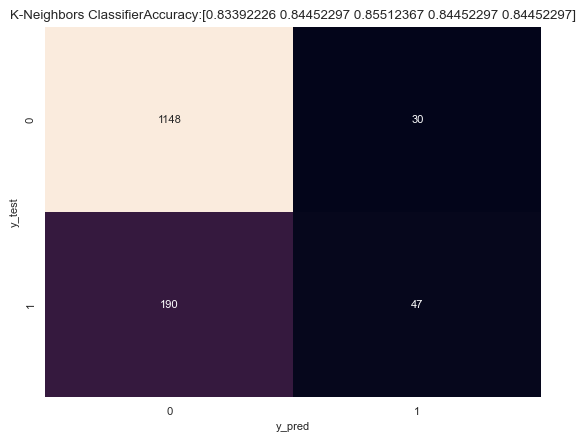

K-Neighbors Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1178
         1.0       0.61      0.20      0.30       237

    accuracy                           0.84      1415
   macro avg       0.73      0.59      0.61      1415
weighted avg       0.82      0.84      0.81      1415

########################################


Decision Tree
Decision Tree Model Dogruluk ortalaması 0.7830388692579506
Decision Tree Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.79858657 0.795053   0.79858657 0.75265018 0.77031802]


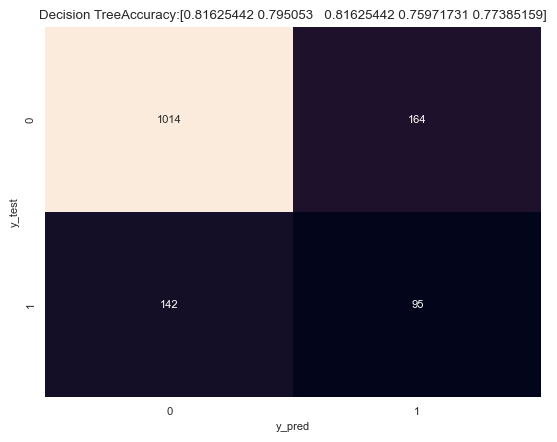

Decision Tree Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1178
         1.0       0.37      0.40      0.38       237

    accuracy                           0.78      1415
   macro avg       0.62      0.63      0.63      1415
weighted avg       0.79      0.78      0.79      1415

########################################


Random Forest
Random Forest Model Dogruluk ortalaması 0.8537102473498234
Random Forest Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.8409894  0.85512367 0.86925795 0.86219081 0.8409894 ]


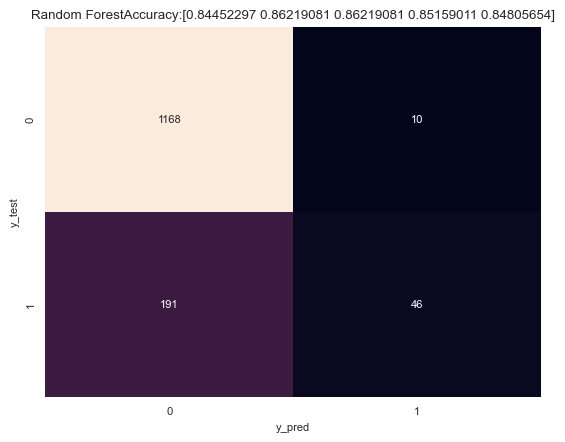

Random Forest Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1178
         1.0       0.82      0.19      0.31       237

    accuracy                           0.86      1415
   macro avg       0.84      0.59      0.62      1415
weighted avg       0.85      0.86      0.82      1415

########################################


Naive Bias Classifier
Naive Bias Classifier Model Dogruluk ortalaması 0.8452296819787986
Naive Bias Classifier Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri [0.83392226 0.83745583 0.83745583 0.84452297 0.87279152]


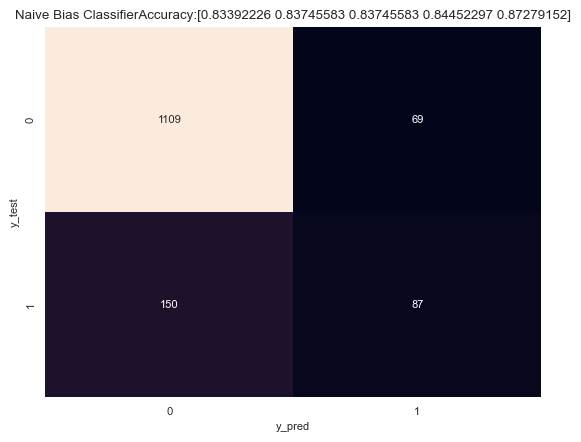

Naive Bias Classifier Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1178
         1.0       0.56      0.37      0.44       237

    accuracy                           0.85      1415
   macro avg       0.72      0.65      0.68      1415
weighted avg       0.83      0.85      0.83      1415

########################################




In [26]:
#model importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

models = {
 "Logistic Classifier":LogisticRegression(),
 "Support Vector Machine ":SVC(),
 "K-Neighbors Classifier":KNeighborsClassifier(),
 "Decision Tree":DecisionTreeClassifier(),
 "Random Forest":RandomForestClassifier(),
 "Naive Bias Classifier":BernoulliNB()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    #model training
    model.fit(X_first,y_first)
    #model Prediction
    y_pred = cross_val_predict(model, X_tl, y_tl, cv = 5)
    accuracy_skor = cross_val_score(model, X_tl, y_tl, cv=5)
    print(list(models.keys())[i])

    print(list(models.keys())[i],'Model Dogruluk ortalaması', accuracy_skor.mean())
    print(list(models.keys())[i],'Modelin herbir verinin bölünmesine göre aldığı farklı doğruluk değerleri', accuracy_skor)

    cf_matrix_log_model=confusion_matrix(y_tl,y_pred)
    sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
    log_model_score=cross_val_score(model, X_tl, y_tl, cv=5)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(list(models.keys())[i]+ "Accuracy:"+str(log_model_score))
    plt.show()


    print(list(models.keys())[i], "Sınıflandırma Raporu")
    print(classification_report(y_tl, y_pred))
    print("#"*40)
    print('\n')


## Unbalanced Data Handling with ROS Method - Random Forest Model with GridSearchCV and Hyperparameter Tuning and Evaluation

In [28]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ros, y_ros, test_size=1/3,random_state=42, stratify=y_ros, shuffle=True)

In [29]:
### Apply Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


clssfr = RandomForestClassifier(random_state = 23)
parameters = {

 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 3],
 'n_estimators': [100,  300, 500],
 'criterion' :['gini', 'entropy']

}


clssfr_cv= GridSearchCV(clssfr,parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3],
                         'n_estimators': [100, 300, 500]})

Random Forest Model Dogrulugu: 0.9562043795620438


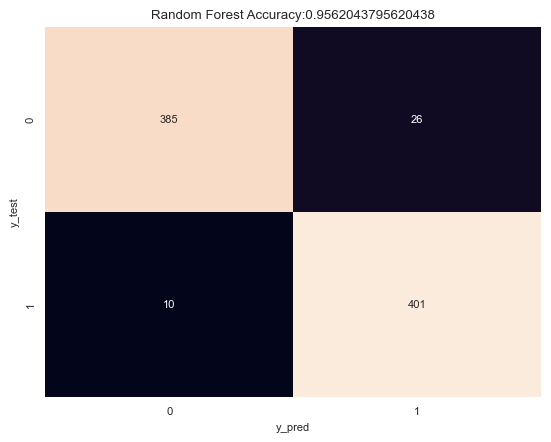

Random Forest Sınıflandırma Raporu
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       411
         1.0       0.94      0.98      0.96       411

    accuracy                           0.96       822
   macro avg       0.96      0.96      0.96       822
weighted avg       0.96      0.96      0.96       822



In [30]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection

y_pred = clssfr_cv.predict(X_test)
accuracy_skor= accuracy_score(y_test,y_pred)

print('Random Forest Model Dogrulugu:', accuracy_skor)

cf_matrix_log_model=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix_log_model,annot=True,cbar=False,fmt="g")
log_model_score=accuracy_score(y_test, y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Random Forest Accuracy:"+str(log_model_score))
plt.show()


print("Random Forest Sınıflandırma Raporu")
print(classification_report(y_test, y_pred))

In [35]:
clssfr_cv.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 300}